# Instagram Usage & Well-being Analysis

##### A Data-Driven Study of Engagement, Stress, and Happiness

- Dataset: Synthetic Instagram user data (~1.5M users, 50+ features)
- Dataset Source: Kaggle
- Focus: Usage patterns, perceived stress, and self-reported happiness
- Role: End-to-end exploratory and hypothesis-driven analysis

### Objective of the Analysis
- Understand how Instagram usage relates to user well-being
- Examine weather perceived stress moderates this relationship
- Identify non-linear usage patterns associated with declining happiness

### Importing Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [3]:
users=pd.read_csv(r"C:\Users\nikhi\Downloads\archive\instagram_users_lifestyle.csv")
users.head()

,user_id,app_name,age,gender,country,urban_rural,income_level,employment_status,education_level,relationship_status,...,last_login_date,average_session_length_minutes,content_type_preference,preferred_content_theme,privacy_setting_level,two_factor_auth_enabled,biometric_login_used,linked_accounts_count,subscription_status,user_engagement_score
0,1,Instagram,51,Female,India,Rural,High,Retired,Bachelor’s,Single,...,2025-11-02,5.0,Mixed,Tech,Private,Yes,No,0,Free,7.83
1,2,Instagram,64,Female,United Kingdom,Urban,Middle,Full-time employed,Other,Divorced,...,2025-03-22,14.8,Photos,Fashion,Public,No,No,3,Free,1.43
2,3,Instagram,41,Female,Canada,Urban,Middle,Student,Bachelor’s,In a relationship,...,2025-08-10,5.0,Mixed,Other,Public,Yes,Yes,1,Free,9.67
3,4,Instagram,27,Non-binary,South Korea,Urban,Middle,Unemployed,Master’s,In a relationship,...,2025-03-31,25.9,Stories,Tech,Private,No,No,1,Free,0.94
4,5,Instagram,55,Male,India,Urban,Upper-middle,Full-time employed,Bachelor’s,Single,...,2025-03-19,13.1,Videos,Food,Public,Yes,No,0,Free,1.03


In [4]:
users.shape

(1547896, 58)

### Data Preparation and Cleaning

In [5]:
# checking for null values
users.isnull().sum()

user_id                           0
app_name                          0
age                               0
gender                            0
country                           0
urban_rural                       0
income_level                      0
employment_status                 0
education_level                   0
relationship_status               0
has_children                      0
exercise_hours_per_week           0
sleep_hours_per_night             0
diet_quality                      0
smoking                           0
alcohol_frequency                 0
perceived_stress_score            0
self_reported_happiness           0
body_mass_index                   0
blood_pressure_systolic           0
blood_pressure_diastolic          0
daily_steps_count                 0
weekly_work_hours                 0
hobbies_count                     0
social_events_per_month           0
books_read_per_year               0
volunteer_hours_per_month         0
travel_frequency_per_year   

In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547896 entries, 0 to 1547895
Data columns (total 58 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   user_id                         1547896 non-null  int64  
 1   app_name                        1547896 non-null  object 
 2   age                             1547896 non-null  int64  
 3   gender                          1547896 non-null  object 
 4   country                         1547896 non-null  object 
 5   urban_rural                     1547896 non-null  object 
 6   income_level                    1547896 non-null  object 
 7   employment_status               1547896 non-null  object 
 8   education_level                 1547896 non-null  object 
 9   relationship_status             1547896 non-null  object 
 10  has_children                    1547896 non-null  object 
 11  exercise_hours_per_week         1547896 non-null  float64
 12  

In [7]:
# converting 'last_login_date' to datetime format.
users['last_login_date']=pd.to_datetime(users['last_login_date'])
users['last_login_date'].dtype

dtype('<M8[ns]')

In [8]:
users['gender'].value_counts()

gender
Male                 743169
Female               742847
Non-binary            46196
Prefer not to say     15684
Name: count, dtype: int64

In [9]:
users['has_children'].value_counts()

has_children
No     1156273
Yes     391623
Name: count, dtype: int64

In [10]:
users['app_name'].value_counts()

app_name
Instagram    1547896
Name: count, dtype: int64

In [11]:
users['employment_status'].value_counts()

employment_status
Full-time employed    629798
Student               308192
Freelancer            168656
Not employed          146258
Unemployed            140593
Part-time             112167
Retired                42232
Name: count, dtype: int64

In [12]:
# changing 'not employed' and 'unemployed' to 'Unemployed' as they both are same
users['employment_status'] = users['employment_status'].replace({'Not employed': 'Unemployed','Unemployed': 'Unemployed'})
users['employment_status'].value_counts()

employment_status
Full-time employed    629798
Student               308192
Unemployed            286851
Freelancer            168656
Part-time             112167
Retired                42232
Name: count, dtype: int64

In [13]:
users['education_level'].value_counts()

education_level
Bachelor’s      541083
High school     387323
Some college    309922
Master’s        185651
Other            77295
PhD              37003
Secondary         4364
Bachelor          2650
High School       2605
Name: count, dtype: int64

In [14]:
# changing "Bachelor" to "Bachelor's" and "High school" to "High School" 
users['education_level']= users['education_level'].replace({"Bachelor": "Bachelor's","Bachelor’s":"Bachelor's","High school":"High School","High school":"High School"})
users['education_level'].value_counts()

education_level
Bachelor's      543733
High School     389928
Some college    309922
Master’s        185651
Other            77295
PhD              37003
Secondary         4364
Name: count, dtype: int64

In [15]:
users['country'].unique()

array(['India', 'United Kingdom', 'Canada', 'South Korea',
       'United States', 'Japan', 'Australia', 'Brazil', 'Other',
       'Germany'], dtype=object)

In [16]:
#exporting cleaned dataframe to csv
#users.to_csv('users_cleaned.csv',index=False)

### Exploratory Data Analysis (EDA)

In [17]:
users.groupby('country')['user_id'].count().sort_values(ascending=False)

country
United States     386829
India             278342
Brazil            186258
Other             154572
United Kingdom    123411
Canada            108584
Australia          92522
South Korea        78050
Germany            77329
Japan              61999
Name: user_id, dtype: int64

In [18]:
(users[users['country'].isin(['United States', 'India', 'Brazil', 'United Kingdom', 'Canada'])]['user_id'].count())/users['user_id'].count()

0.699933328854135

User distribution is highly concentrated, with the United States, India, Brazil, the United Kingdom, and Canada comprising nearly 70% of all users.

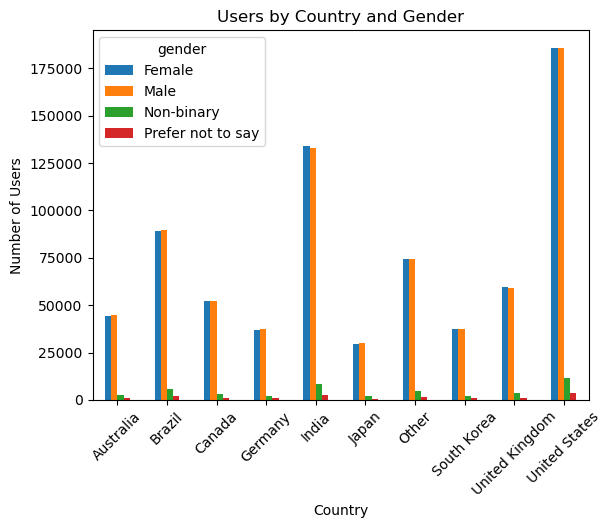

In [19]:
user_per_country_gender = users.groupby(['country', 'gender'])['user_id'].count().unstack()
user_per_country_gender.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.title('Users by Country and Gender')
plt.xticks(rotation=45)
plt.show()

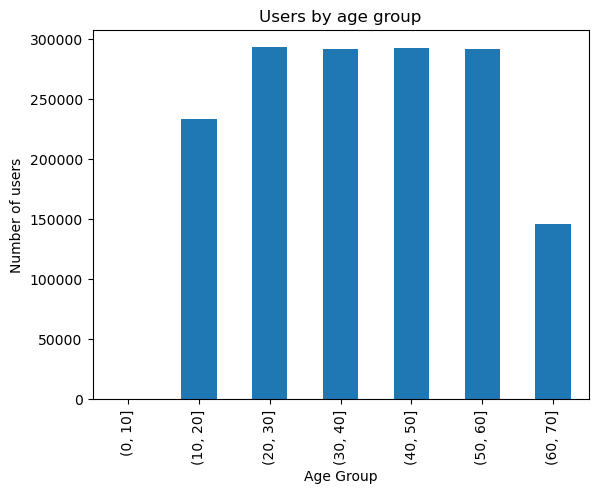

In [20]:
users['age_group']=pd.cut(users['age'],bins=range(0,users['age'].max()+10,10))
age_counts=users['age_group'].value_counts().sort_index()
age_counts.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Number of users')
plt.title('Users by age group')
plt.show()

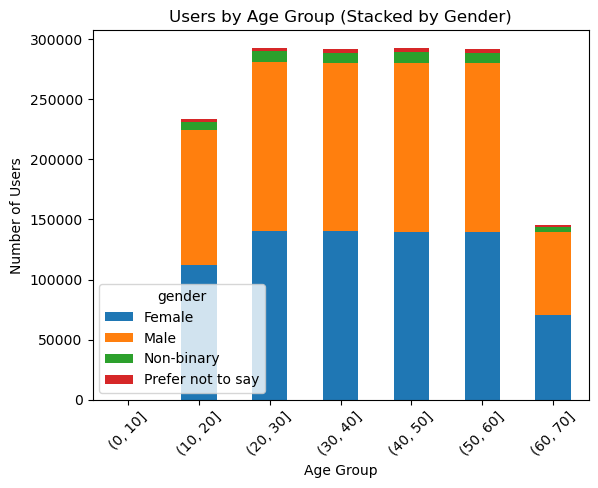

In [21]:
users['age_group']=pd.cut(users['age'],bins=range(0,users['age'].max()+10,10))
age_gender_counts = (users.groupby(['age_group', 'gender']).size().unstack())
age_gender_counts.plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.title('Users by Age Group (Stacked by Gender)')
plt.xticks(rotation=45)
plt.show()

User distribution is highest between ages 20 and 60, moderate for 10–20, and minimal for users above 60. However gender distribution is almost similar for all age groups.

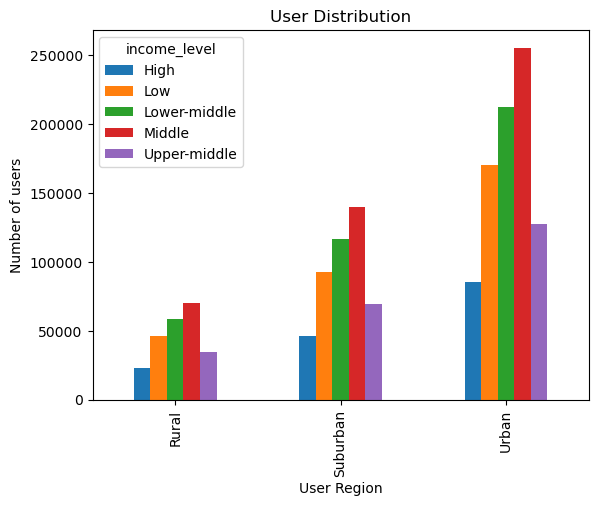

In [22]:
user_distribution_cities=users.groupby(['urban_rural','income_level'])['user_id'].count().unstack()
user_distribution_cities.plot(kind='bar')
plt.xlabel('User Region')
plt.ylabel('Number of users')
plt.title('User Distribution')
plt.show()

User adoption rises steadily from low to middle income groups and declines sharply beyond the middle income segment, indicating that the platform primarily serves a mass-market audience. Strong engagement among middle-income users suggests high perceived value for this segment, while lower adoption among upper-middle and high-income groups points to different preferences, usage behavior, or weaker value perception. The consistency of this trend across regions confirms income level as a key driver of usage rather than geography, highlighting scope for targeted positioning or feature differentiation to attract higher-income users.

[]

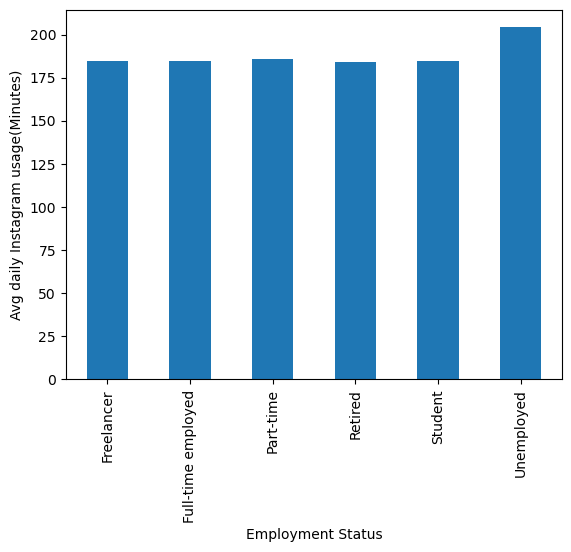

In [23]:
employed=users.groupby('employment_status')['daily_active_minutes_instagram'].mean()
employed.plot(kind='bar')
plt.xlabel('Employment Status')
plt.ylabel('Avg daily Instagram usage(Minutes)')
plt.plot()

The analysis shows that unemployed users have the highest average daily Instagram usage compared to other employment groups.

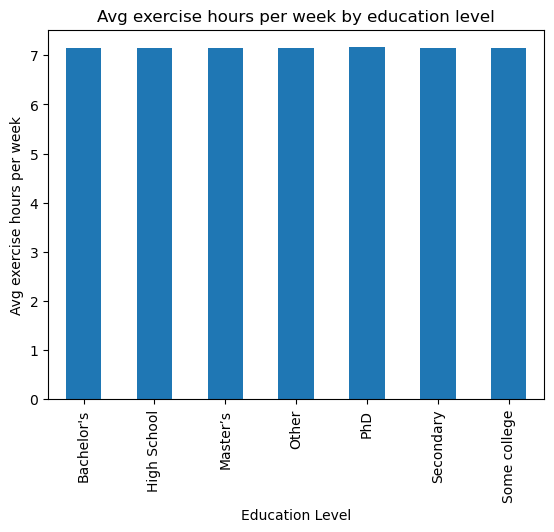

In [24]:
ed_ex=users.groupby('education_level')['exercise_hours_per_week'].mean()
ed_ex.plot(kind='bar')
plt.xlabel('Education Level')
plt.ylabel('Avg exercise hours per week')
plt.title('Avg exercise hours per week by education level')
plt.show()

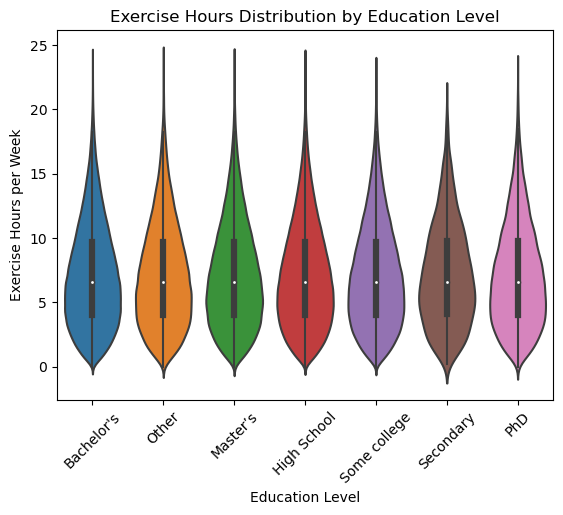

In [25]:
sns.violinplot(x='education_level', y='exercise_hours_per_week', data=users)
plt.xlabel('Education Level')
plt.ylabel('Exercise Hours per Week')
plt.xticks(rotation=45)
plt.title('Exercise Hours Distribution by Education Level')
plt.show()

The average exercise hours per week across all education levels is around 7 hours. Both the bar chart and violin plot indicate that this pattern is consistent, with most users exercising between 0 and 12 hours per week. This suggests that education level has little effect on weekly exercise habits in this dataset.

[]

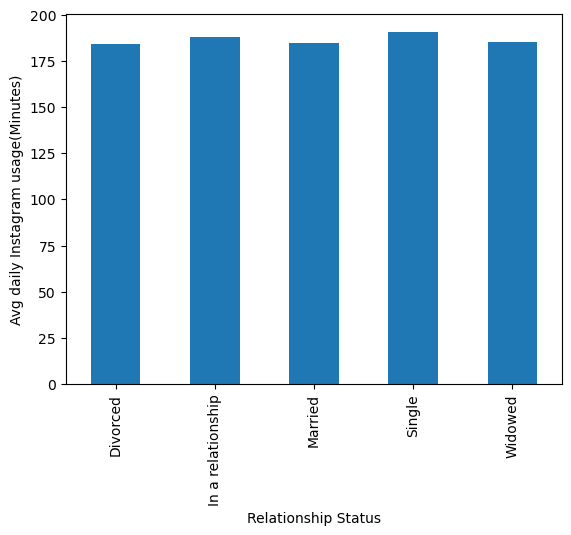

In [26]:
relationship=users.groupby('relationship_status')['daily_active_minutes_instagram'].mean()
relationship.plot(kind='bar')
plt.xlabel('Relationship Status')
plt.ylabel('Avg daily Instagram usage(Minutes)')
plt.plot()

[]

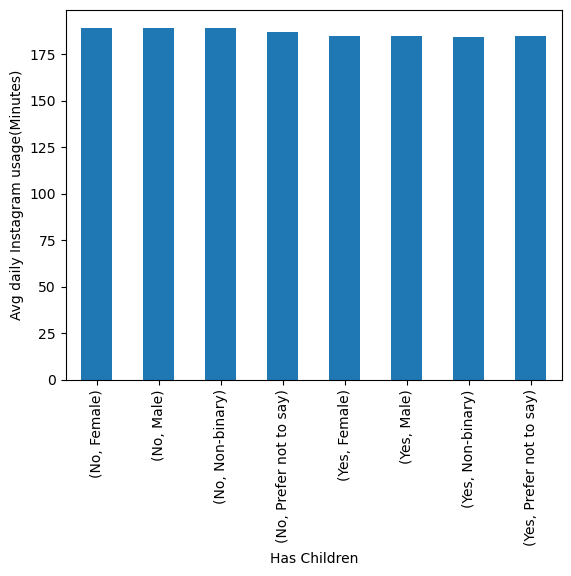

In [27]:
children=users.groupby(['has_children','gender'])['daily_active_minutes_instagram'].mean()
children.plot(kind='bar')
plt.xlabel('Has Children')
plt.ylabel('Avg daily Instagram usage(Minutes)')
plt.plot()

[]

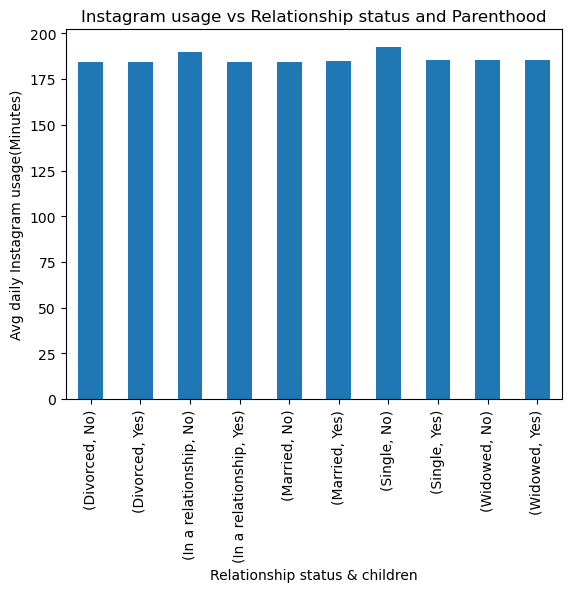

In [28]:
life_status=users.groupby(['relationship_status','has_children'])['daily_active_minutes_instagram'].mean()
life_status.plot(kind='bar')
plt.xlabel('Relationship status & children')
plt.ylabel('Avg daily Instagram usage(Minutes)')
plt.title('Instagram usage vs Relationship status and Parenthood')
plt.plot()

People without children consistently show higher average daily Instagram usage compared to those with children, indicating that parenthood is associated with reduced time spent on the platform.

Among relationship categories, single individuals and those in relationships without children exhibit the highest levels of Instagram engagement. In contrast, users who have children—regardless of relationship status—tend to spend less time on Instagram, likely due to greater time and responsibility constraints.

### Finding corelations between numerical parameters

In [29]:
corr_matrix=users.select_dtypes(include='number').corr()['daily_active_minutes_instagram'].sort_values(ascending=False)
corr_matrix

daily_active_minutes_instagram    1.000000
likes_given_per_day               0.980951
time_on_feed_per_day              0.974875
stories_viewed_per_day            0.955279
comments_written_per_day          0.942986
time_on_reels_per_day             0.934326
dms_received_per_week             0.922335
dms_sent_per_week                 0.898950
time_on_messages_per_day          0.897741
ads_viewed_per_day                0.891905
reels_watched_per_day             0.874479
time_on_explore_per_day           0.867795
perceived_stress_score            0.834515
sessions_per_day                  0.748179
ads_clicked_per_day               0.710315
posts_created_per_week            0.505909
average_session_length_minutes    0.196937
following_count                   0.076232
followers_count                   0.066583
account_creation_year             0.060509
books_read_per_year               0.001087
hobbies_count                     0.000771
blood_pressure_systolic           0.000545
blood_press

Daily Instagram usage shows strong positive correlations with in-app engagement behaviors such as likes, time spent on feed, stories viewed, comments, and reels consumption, indicating that usage is primarily driven by content interaction rather than social network size. Session frequency correlates more strongly with total usage than average session length, suggesting frequent short visits. Higher usage is also associated with increased perceived stress and lower self-reported happiness, highlighting a potential well-being trade-off. In contrast, demographic, lifestyle, and follower-related variables show weak correlations, implying that Instagram usage intensity is largely shaped by in-platform behavior.

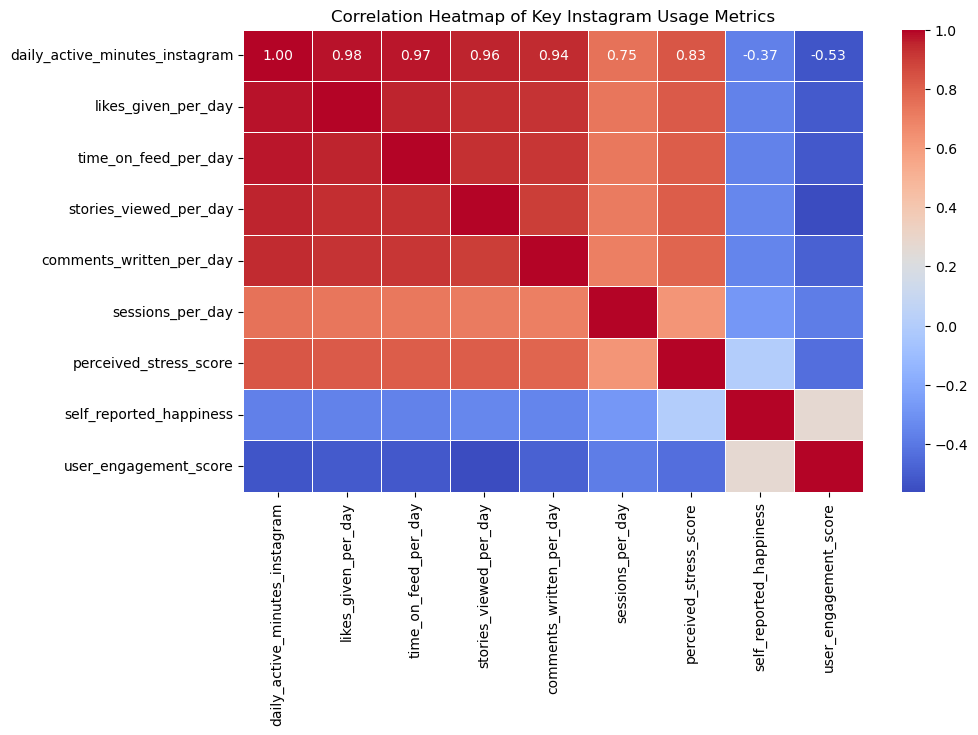

In [30]:
cols = ['daily_active_minutes_instagram','likes_given_per_day','time_on_feed_per_day','stories_viewed_per_day','comments_written_per_day','sessions_per_day','perceived_stress_score','self_reported_happiness','user_engagement_score']
corr_matrix = users[cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Correlation Heatmap of Key Instagram Usage Metrics')
plt.show()

### Hypothesis-Driven Analysis: Stress as a Moderator


In [31]:
users['stress_group'] = pd.cut(users['perceived_stress_score'],bins=[0, 3, 6, 10],labels=['Low Stress', 'Medium Stress', 'High Stress'],include_lowest=True)

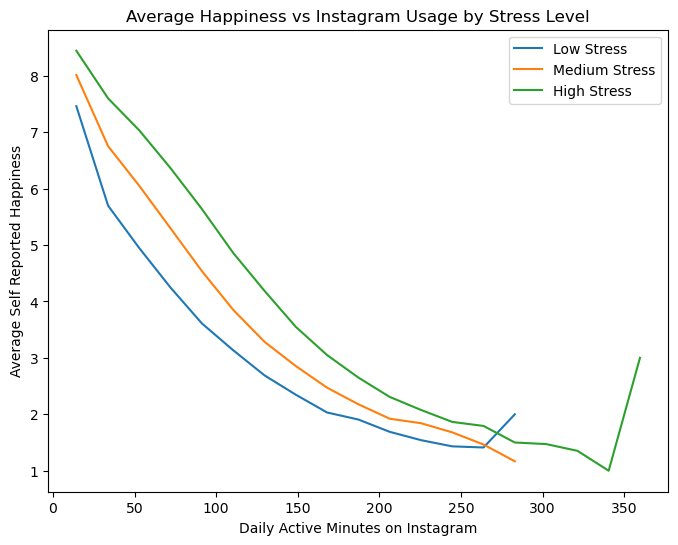

In [48]:
users['usage_bin'] = pd.cut(users['daily_active_minutes_instagram'], bins=30)
trend_data = (users.groupby(['stress_group', 'usage_bin'])['self_reported_happiness'].mean().reset_index())
plt.figure(figsize=(8, 6))
for group in trend_data['stress_group'].unique():
    subset = trend_data[trend_data['stress_group'] == group]
    plt.plot(subset['usage_bin'].apply(lambda x: x.mid),subset['self_reported_happiness'],label=group)
plt.xlabel('Daily Active Minutes on Instagram')
plt.ylabel('Average Self Reported Happiness')
plt.title('Average Happiness vs Instagram Usage by Stress Level')
plt.legend()
plt.show()

In [33]:
users.groupby('stress_group')[['daily_active_minutes_instagram','self_reported_happiness']].corr().iloc[0::2, -1]

stress_group                                 
Low Stress     daily_active_minutes_instagram   -0.643342
Medium Stress  daily_active_minutes_instagram   -0.672833
High Stress    daily_active_minutes_instagram   -0.676197
Name: self_reported_happiness, dtype: float64

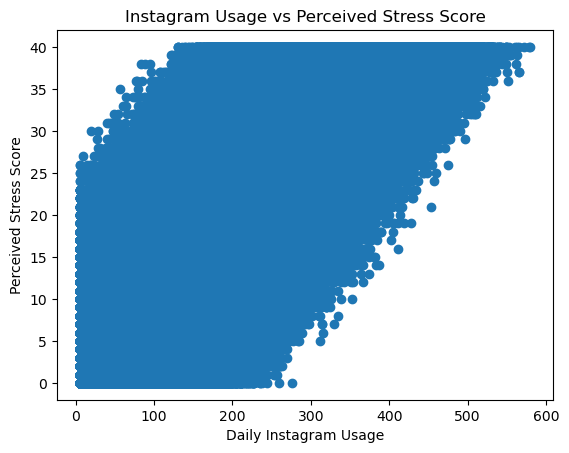

In [34]:
plt.scatter(users['daily_active_minutes_instagram'],users['perceived_stress_score'])
plt.xlabel('Daily Instagram Usage')
plt.ylabel('Perceived Stress Score')
plt.title('Instagram Usage vs Perceived Stress Score')
plt.show()

Hypothesis:
- The relationship between Instagram usage and self-reported happiness differs based on a user's perceived stress level.

Rationale:
- Users under high stress may experience social media usage differently than low-stress users, potentially amplifying negative effects.

### Non-Linear Effects of Instagram Usage

This section explores whether the impact of Instagram usage on well-being remains consistent across different usage levels or changes after certain thresholds.

In [35]:
usage_bins = [0, 60, 120, users['daily_active_minutes_instagram'].max()]
usage_labels = ['Low Usage (<1 hr)', 'Moderate Usage (1–2 hrs)', 'Heavy Usage (>2 hrs)']
users['usage_group'] = pd.cut(users['daily_active_minutes_instagram'],bins=usage_bins,labels=usage_labels,include_lowest=True)

In [36]:
usage_summary = users.groupby('usage_group')[['self_reported_happiness','perceived_stress_score']].mean()
usage_summary

,self_reported_happiness,perceived_stress_score
usage_group,,
Low Usage (<1 hr),7.391364,5.617242
Moderate Usage (1–2 hrs),6.014484,10.291658
Heavy Usage (>2 hrs),4.981288,25.209901


In [50]:
percent_heavy_users= ((users['usage_group']=='Heavy Usage (>2 hrs)').sum()/len(users))*100
percent_heavy_users

69.66126923255827

2 in every 3 users have heavy Instagram usage i.e., have an Instagram usage time of more than 2 hours.

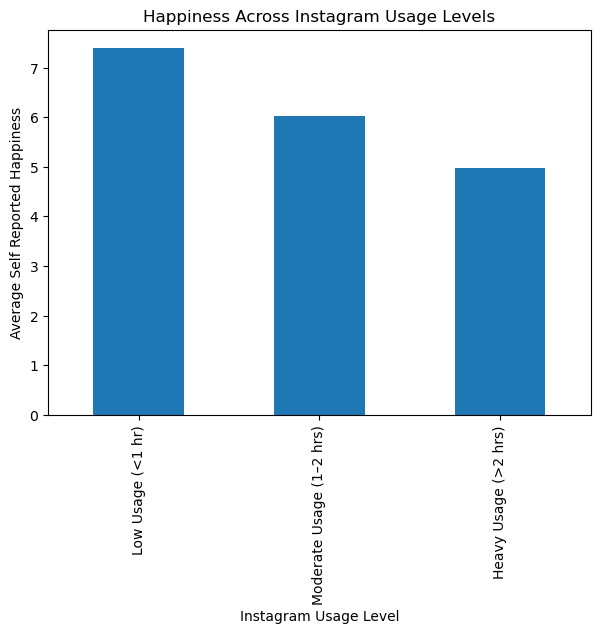

In [37]:
usage_summary['self_reported_happiness'].plot(kind='bar', figsize=(7, 5))
plt.xlabel('Instagram Usage Level')
plt.ylabel('Average Self Reported Happiness')
plt.title('Happiness Across Instagram Usage Levels')
plt.show()

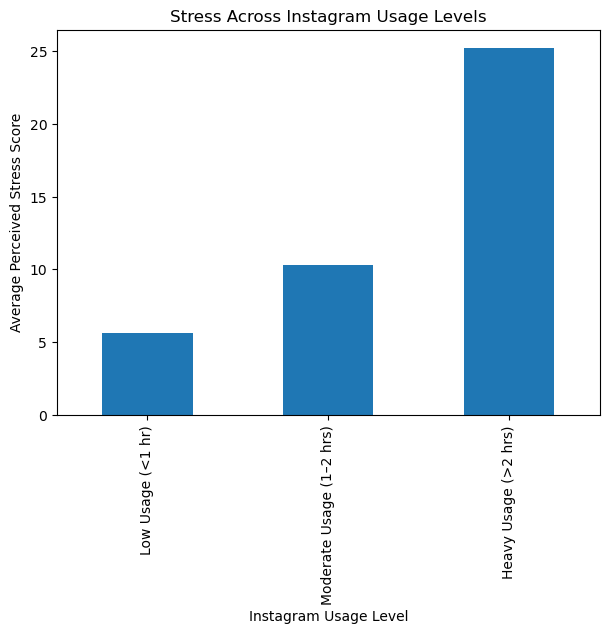

In [38]:
usage_summary['perceived_stress_score'].plot(kind='bar', figsize=(7, 5))
plt.xlabel('Instagram Usage Level')
plt.ylabel('Average Perceived Stress Score')
plt.title('Stress Across Instagram Usage Levels')
plt.show()

The plots indicate a consistent decline in self-reported happiness as daily Instagram usage increases. In contrast, perceived stress shows a steady upward trend with prolonged usage up to moderate levels, followed by a sharp increase once usage exceeds two hours per day. Together, these patterns suggest that higher levels of Instagram use are associated with increased stress and reduced happiness.

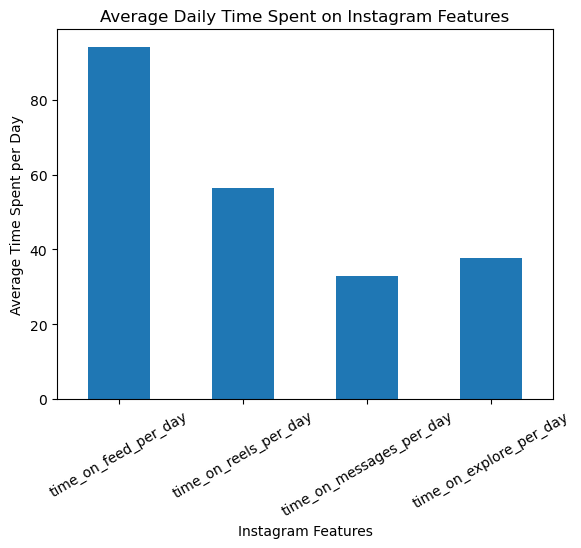

In [39]:
columns = ['time_on_feed_per_day','time_on_reels_per_day','time_on_messages_per_day','time_on_explore_per_day']
avg_time = users[columns].mean()
avg_time.plot(kind='bar')
plt.xlabel('Instagram Features')
plt.ylabel('Average Time Spent per Day')
plt.title('Average Daily Time Spent on Instagram Features')
plt.xticks(rotation=30)
plt.show()

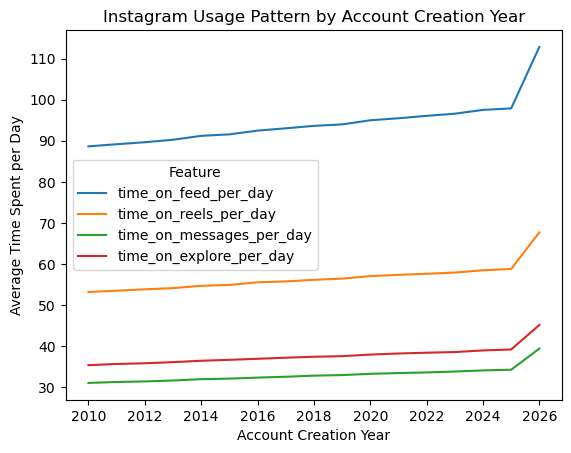

In [40]:
columns=['time_on_feed_per_day','time_on_reels_per_day','time_on_messages_per_day','time_on_explore_per_day']
yearly_usage = users.groupby('account_creation_year')[columns].mean()
yearly_usage.plot()
plt.xlabel('Account Creation Year')
plt.ylabel('Average Time Spent per Day')
plt.title('Instagram Usage Pattern by Account Creation Year')
plt.legend(title='Feature')
plt.show()

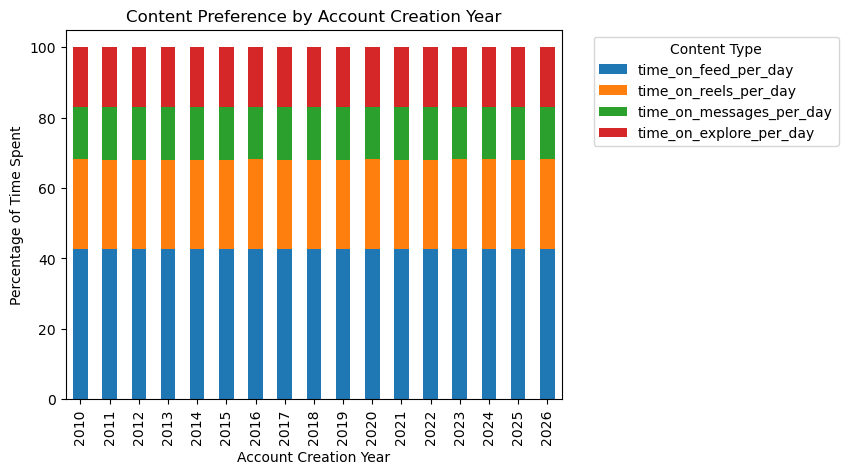

In [41]:
preference = yearly_usage.div(yearly_usage.sum(axis=1), axis=0)*100
preference.plot(kind='bar', stacked=True)
plt.xlabel('Account Creation Year')
plt.ylabel('Percentage of Time Spent')
plt.title('Content Preference by Account Creation Year')
plt.legend(title='Content Type', bbox_to_anchor=(1.05, 1))
plt.show()

Taken together, these three visuals show how Instagram has scaled attention without changing its core identity. The feed remains the single largest time sink across all user cohorts, anchoring daily usage, while reels exhibit the fastest growth and increasingly capture incremental attention—especially among newer users. Absolute time spent across all features rises for newer account creation years, indicating intensifying engagement rather than feature substitution. At the same time, the stacked preference chart reveals that relative time distribution across feed, reels, messages, and explore stays remarkably stable, suggesting Instagram expands total user attention instead of shifting it. In short, Instagram has evolved into a more time-intensive platform by layering high-engagement formats like reels on top of a still-dominant feed, rather than disrupting existing usage patterns.

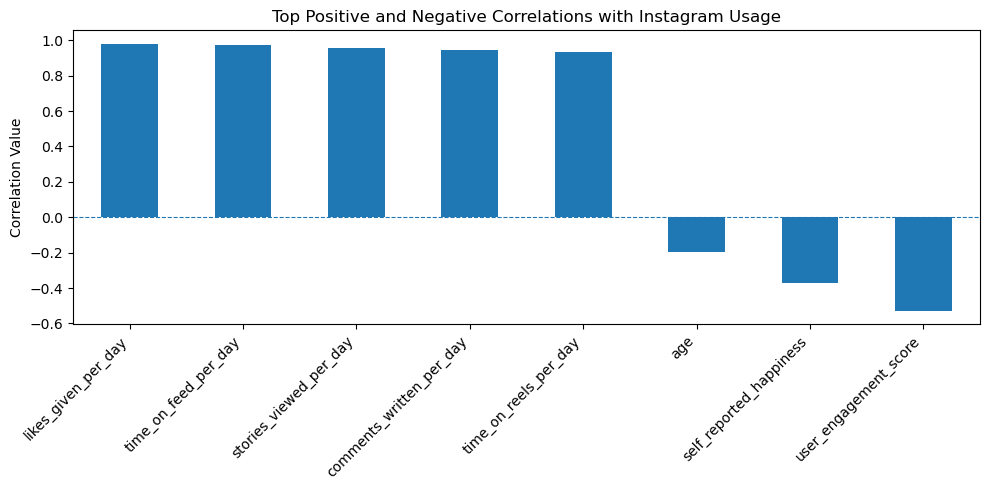

In [42]:
target_corr = users.corr(numeric_only=True)['daily_active_minutes_instagram']
target_corr = target_corr.drop('daily_active_minutes_instagram')
sorted_corr = target_corr.sort_values(ascending=False)
top_positive = sorted_corr.head(5)
top_negative = sorted_corr.tail(3)
top_corr = pd.concat([top_positive, top_negative])
plt.figure(figsize=(10, 5))
top_corr.plot(kind='bar')
plt.axhline(0, linestyle='--', linewidth=0.8)
plt.ylabel('Correlation Value')
plt.title('Top Positive and Negative Correlations with Instagram Usage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The correlation analysis reveals strong positive relationships between Instagram usage and interaction metrics, alongside moderate negative correlations with self-reported happiness and user engagement score.
The visualization suggests that higher levels of Instagram usage are associated with elevated perceived stress.

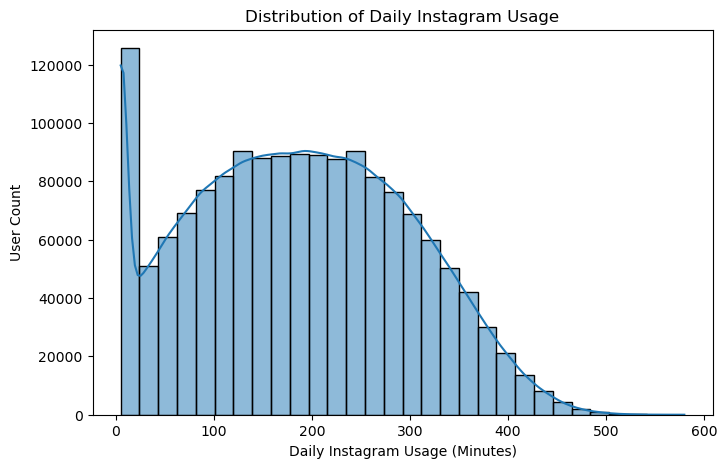

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(users['daily_active_minutes_instagram'], bins=30, kde=True)
plt.xlabel('Daily Instagram Usage (Minutes)')
plt.ylabel('User Count')
plt.title('Distribution of Daily Instagram Usage')
plt.show()

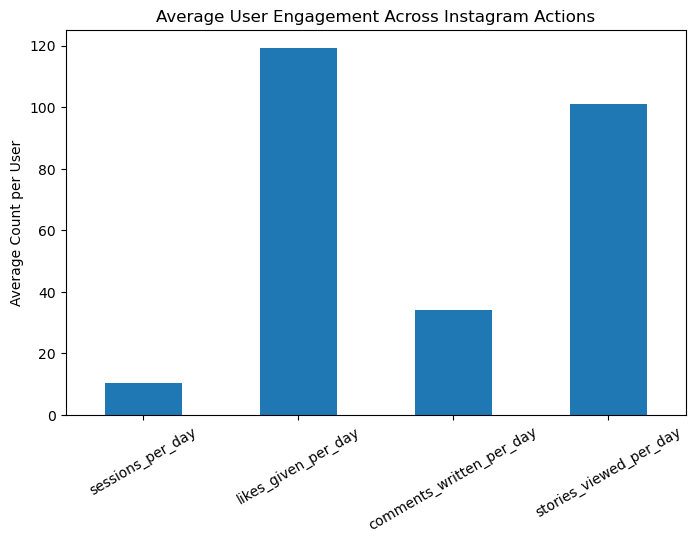

In [44]:
engagement_metrics = ['sessions_per_day','likes_given_per_day','comments_written_per_day','stories_viewed_per_day']
users[engagement_metrics].mean().plot(kind='bar', figsize=(8,5))
plt.ylabel('Average Count per User')
plt.title('Average User Engagement Across Instagram Actions')
plt.xticks(rotation=30)
plt.show()

Users engage heavily in low-effort actions (views, likes), while high-effort actions (comments) remain comparatively low.

In [45]:
user_engagement_corr=users.select_dtypes(include='number').corr()['user_engagement_score'].sort_values(ascending=False)
user_engagement_corr

user_engagement_score             1.000000
self_reported_happiness           0.268017
age                               0.111829
weekly_work_hours                 0.031085
user_id                           0.001785
travel_frequency_per_year         0.001358
volunteer_hours_per_month         0.001075
daily_steps_count                 0.000633
sleep_hours_per_night             0.000568
hobbies_count                     0.000310
body_mass_index                   0.000197
linked_accounts_count             0.000033
social_events_per_month          -0.000225
notification_response_rate       -0.000337
blood_pressure_diastolic         -0.000599
blood_pressure_systolic          -0.001036
books_read_per_year              -0.001141
exercise_hours_per_week          -0.001181
followers_count                  -0.021386
following_count                  -0.023843
account_creation_year            -0.024278
posts_created_per_week           -0.161097
ads_clicked_per_day              -0.376258
sessions_pe

The correlation results indicate that users with higher engagement tend to spend more focused time on individual content rather than scrolling rapidly through multiple features. This is further supported by the negative correlations between the user engagement score and interactions with a wide range of Instagram features, such as reels, messages, likes, comments, and stories. In other words, highly engaged users prefer deeper, more concentrated interactions over frequent, superficial activity across the platform.

## Conclusion

This analysis examined the relationship between Instagram usage patterns and user well-being across a large synthetic dataset, with a specific focus on how perceived stress moderates the impact of social media engagement on self-reported happiness. The findings highlight that platform usage alone does not determine well-being outcomes; instead, contextual and psychological factors play a decisive role.

### Key Insights

- Engagement intensity is strongly correlated with platform usage metrics, such as likes, comments, feed time, and stories viewed, indicating that overall activity on Instagram scales together rather than operating in isolation.

- Self-reported happiness shows only a weak direct correlation with Instagram usage, suggesting that time spent on the platform is not inherently harmful or beneficial to well-being when evaluated in isolation.

- Perceived stress emerges as a critical moderating factor. Users reporting higher stress levels tend to experience lower happiness at comparable levels of Instagram usage, while low-stress users show relatively stable well-being even with increased engagement.

- Non-linear patterns indicate diminishing returns. Moderate engagement does not significantly reduce happiness, but excessive usage under high stress conditions is associated with a noticeable decline in well-being, pointing to threshold effects rather than linear harm.

- Demographic and lifestyle variables contribute marginally compared to psychological factors, reinforcing that mental context outweighs raw usage metrics in explaining well-being differences.

### Practical Implications

- For product and growth teams: Usage metrics alone are insufficient proxies for user well-being. Integrating stress-aware or context-aware indicators could lead to more responsible engagement strategies.

- For researchers and analysts: Well-being analyses should account for moderating variables such as stress rather than assuming uniform effects across users.

- For users and policymakers: Reducing stressors may be more impactful for digital well-being than blanket reductions in social media usage.

### Limitations & Future Scope

- This study is based on synthetic, self-reported data and is correlational in nature; therefore, causal conclusions cannot be drawn. Future analyses could incorporate:

- Statistical hypothesis testing to validate observed patterns

- User segmentation to identify vulnerable subgroups

- Longitudinal data to assess temporal effects

- Platform-level interventions and behavioral outcomes

#### Closing Statement

Overall, the findings suggest that social media usage is not inherently detrimental to well-being, but its impact is highly conditional on psychological context. Effective analysis and decision-making in this domain require moving beyond surface-level usage metrics toward a more nuanced, user-centric understanding of digital behavior.